In [11]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

In [2]:
class TravelState(TypedDict):
    destination: str
    weather: str
    traffic_level: str
    route_chosen: str
    travel_time: int
    transport_mode: str
    route_reason: str

In [ ]:
# nodes
# 1. cek kondisi
# 2. pilih moda transportasi
# 3. (jalan tol, jalan kota, transportasi umum)

In [ ]:
def check_conditions_node(state: TravelState) -> TravelState:
    print("Mengecek kondisi...")

    destination = state['destination']

    if 'mall' in destination.lower():
        weather = 'clear'
        traffic_level = 'high'
    elif 'office' in destination.lower():
        weather = 'rainy'
        traffic_level = 'mid'
    else:
        weather = 'cloudy'
        traffic_level = 'low'

    return {
        'destination': destination,
        'weather': weather,
        'traffic_level': traffic_level,
        'route_chosen': '',
        'travel_time': 0,
        'transport_mode': '',
        'route_reason': ''
    }

In [4]:
def highway_route_node(state: TravelState) -> TravelState:
    print("Memilih rute jalan tol...")
    return {
        'destination': state['destination'],
        'weather': state['weather'],
        'traffic_level': state['traffic_level'],
        'route_chosen': 'highway',
        'travel_time': 30,
        'transport_mode': 'car',
        'route_reason': 'Faster route with highway'
    }

In [5]:
def city_road_route_node(state: TravelState) -> TravelState:
    print("Memilih rute jalan kota...")
    return {
        'destination': state['destination'],
        'weather': state['weather'],
        'traffic_level': state['traffic_level'],
        'route_chosen': 'city road',
        'travel_time': 45,
        'transport_mode': 'motorcycle',
        'route_reason': 'Avoid tolls and enjoy city view'
    }

In [6]:
def public_transport_route_node(state: TravelState) -> TravelState:
    print("Memilih rute transportasi umum...")
    return {
        'destination': state['destination'],
        'weather': state['weather'],
        'traffic_level': state['traffic_level'],
        'route_chosen': 'public transport',
        'travel_time': 60,
        'transport_mode': 'bus',
        'route_reason': 'Cost-effective and eco-friendly'
    }

In [7]:
def route_selection_node(state: TravelState) -> TravelState:
    print("Memilih moda transportasi berdasarkan kondisi...")
    weather = state['weather']
    traffic_level = state['traffic_level']

    if weather == 'rainy' and traffic_level == 'high':
        return "public_transport"
    elif traffic_level == 'low':
        return "highway"
    elif traffic_level == 'mid':
        return "city_road"
    else:
        return "public_transport"

In [ ]:
workflow = StateGraph(TravelState)

workflow.add_node("check_conditions", check_conditions_node)
workflow.add_node("highway", highway_route_node)
workflow.add_node("city_road", city_road_route_node)
workflow.add_node("public_transport", public_transport_route_node)

# edges
workflow.add_edge(START, "check_conditions")

workflow.add_conditional_edges(
    "check_conditions", # node awal (origin)
    route_selection_node, # next node ditentukan oleh fungsi ini
    {
        "highway": "highway", # nilai dari route : node tujuan
        "city_road": "city_road",
        "public_transport": "public_transport"
    }
)

workflow.add_edge("highway", END)
workflow.add_edge("city_road", END)
workflow.add_edge("public_transport", END)

app = workflow.compile()

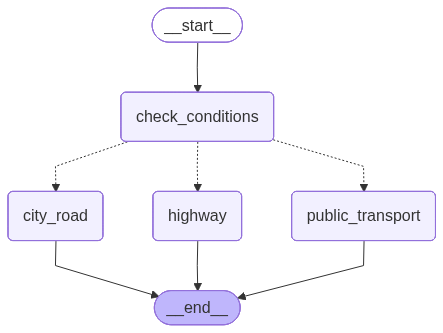

In [12]:
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
destinasi = "pergi ke my office di daerah setiabudi"

In [18]:
initial_state: TravelState = {
    'destination': destinasi,
    'weather': '',
    'traffic_level': '',
    'route_chosen': '',
    'travel_time': 0,
    'transport_mode': '',
    'route_reason': ''
}

In [19]:
result = app.invoke(initial_state)

Mengecek kondisi
Memilih moda transportasi berdasarkan kondisi...
Memilih rute jalan kota...


In [20]:
result

{'destination': 'pergi ke my office di daerah setiabudi',
 'weather': 'rainy',
 'traffic_level': 'mid',
 'route_chosen': 'city road',
 'travel_time': 45,
 'transport_mode': 'motorcycle',
 'route_reason': 'Avoid tolls and enjoy city view'}